<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT306 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [2]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://cdn.jsdelivr.net/gh/fralfaro/MAT306/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


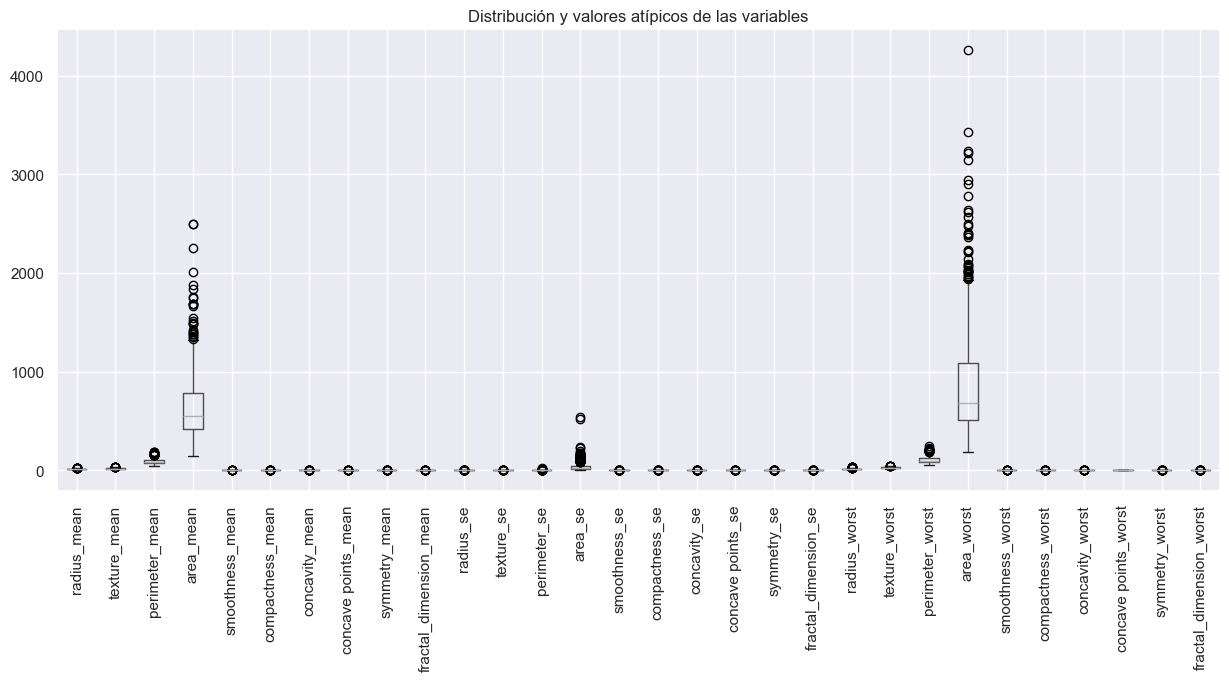

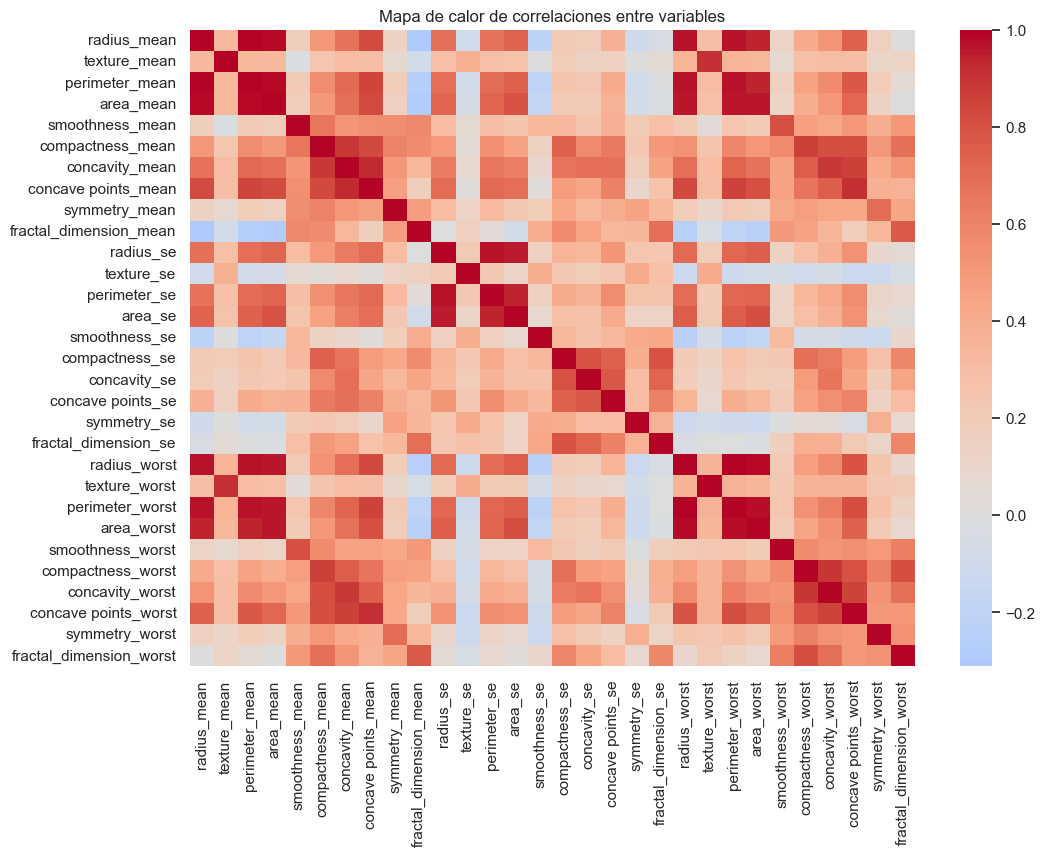

In [16]:
df.describe().T

df.drop('diagnosis', axis=1).boxplot(figsize=(15,6))
plt.title("Distribución y valores atípicos de las variables")
plt.xticks(rotation=90)
plt.show()

corr = df.drop('diagnosis', axis=1).corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Mapa de calor de correlaciones entre variables")
plt.show()


El mapa de calor evidencia fuertes correlaciones positivas entre variables geométricas como `radius_mean`, `perimeter_mean` y `area_mean`, lo que indica redundancia de información. Las variables con sufijo `_worst` también muestran alta correlación entre sí, mientras que características como `fractal_dimension_mean` y `smoothness_mean` presentan baja correlación, aportando información complementaria y útil para la clasificación de tumores.

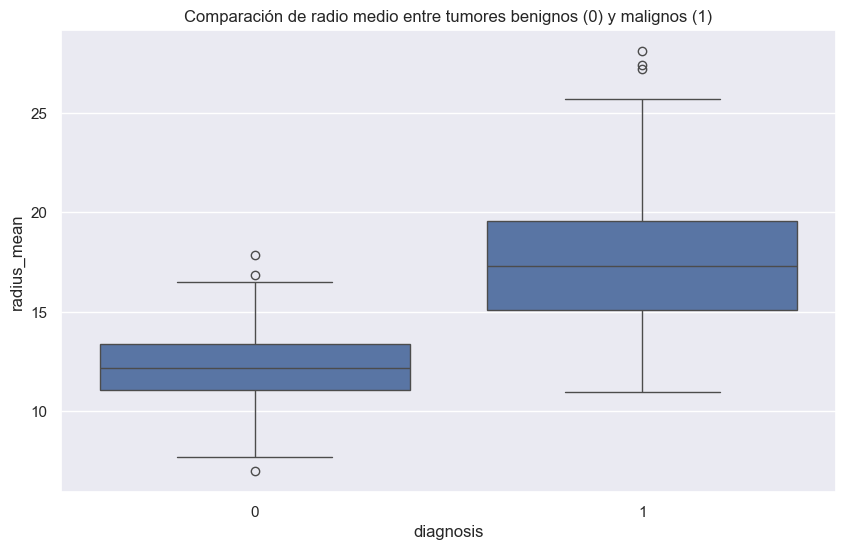

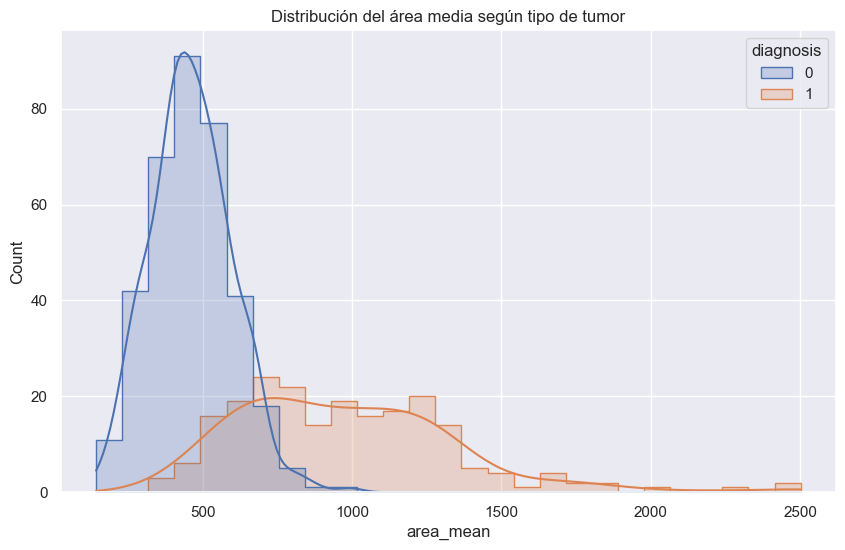

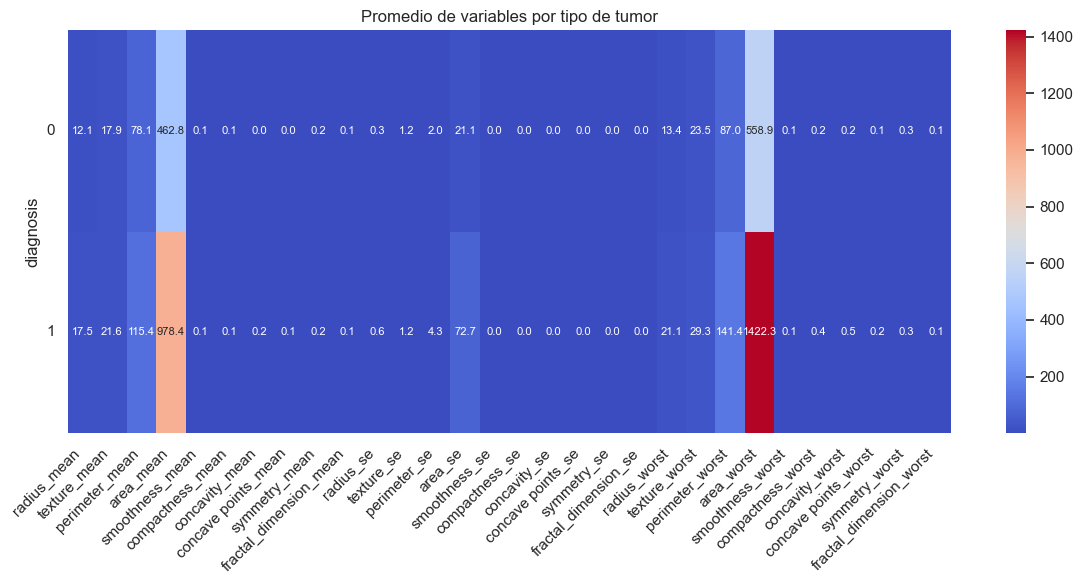

In [17]:
# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title("Comparación de radio medio entre tumores benignos (0) y malignos (1)")
plt.show()

# Histograma
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='area_mean', hue='diagnosis', kde=True, element='step')
plt.title("Distribución del área media según tipo de tumor")
plt.show()

# Mapa de calor
plt.figure(figsize=(12,6))
sns.heatmap(df.groupby('diagnosis').mean(), cmap='coolwarm', annot=True, fmt=".1f", cbar=True, annot_kws={"size":8})
plt.title("Promedio de variables por tipo de tumor")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Los tumores malignos presentan valores significativamente mayores en variables como `radius_mean`, `area_mean` y `perimeter_mean`, reflejando un tamaño celular más grande. Además, muestran mayor compactación y concavidad, lo que sugiere estructuras más irregulares y agresivas. En contraste, los tumores benignos tienen distribuciones más concentradas y valores más bajos en la mayoría de estas características, indicando una morfología más uniforme y menos invasiva.

Las variables con mayor capacidad discriminativa entre tumores benignos y malignos son `radius_mean`, `area_mean`, `perimeter_mean` y `concavity_mean`, ya que muestran las mayores diferencias de medias y varianzas entre ambos grupos, siendo clave para distinguir la morfología y tamaño celular característicos de cada tipo de tumor.


2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


In [18]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [19]:
# Matriz de correlación
corr_matrix = X_scaled.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Eliminar variables
X_reduced = X_scaled.drop(columns=to_drop)
X_reduced.head()


,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.568466,3.283515,2.652874,2.217515,2.255747,2.489734,-0.565265,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.307686,2.616665,2.109526,2.750622,1.937015
1,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.001392,-0.868652,0.499255,-0.876244,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,-0.375612,-0.430444,-0.146749,-0.243890,0.281190
2,1.579888,0.456187,0.942210,1.052926,1.363478,0.939685,-0.398008,1.228676,-0.780083,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,0.527407,1.082932,0.854974,1.152255,0.201391
3,-0.768909,0.253732,3.283553,3.402909,1.915897,2.867383,4.910919,0.326373,-0.110409,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,3.394275,3.893397,1.989588,6.046041,4.935010
4,1.750297,-1.151816,0.280372,0.539340,1.371011,-0.009560,-0.562450,1.270543,-0.790244,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,0.220556,-0.313395,0.613179,-0.868353,-0.397100


Se aplicó **StandardScaler** para asegurar que todas las variables contribuyan equitativamente al modelo al tener media 0 y desviación estándar 1. Además, se eliminó la **multicolinealidad** descartando variables con correlación mayor a 0.9, evitando redundancia de información y mejorando la estabilidad e interpretabilidad de los modelos posteriores.


3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


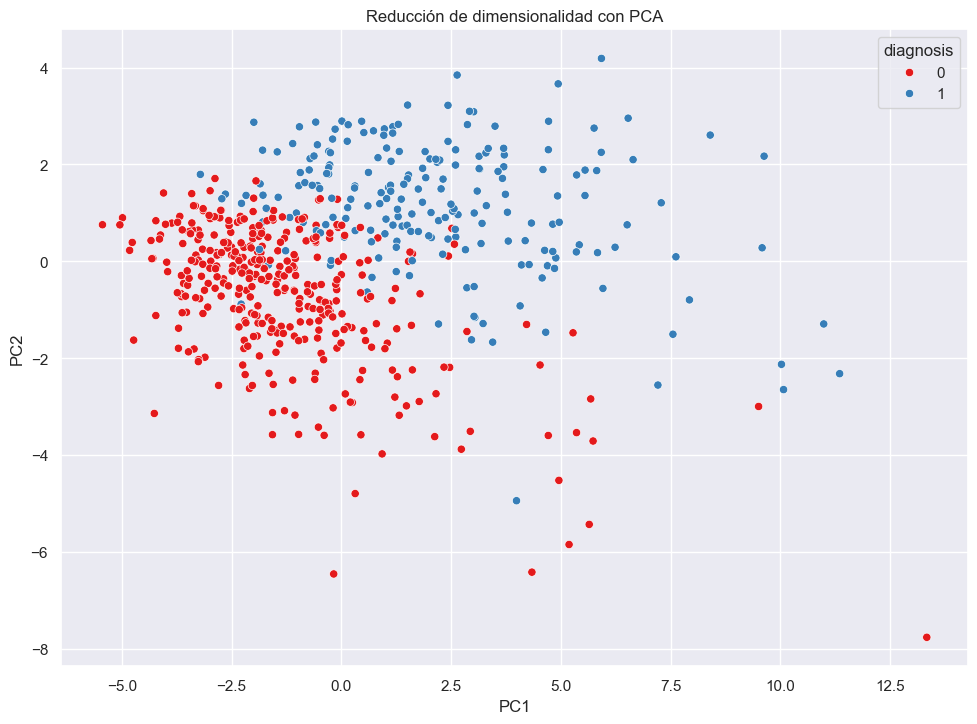

In [20]:
# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_reduced)

# Convertir a DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['diagnosis'] = y.values

# Visualización
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='diagnosis', palette='Set1')
plt.title('Reducción de dimensionalidad con PCA')
plt.show()


In [21]:
explained_var = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:", explained_var)
print("Varianza total explicada (acumulada):", explained_var.sum())

Varianza explicada por cada componente: [0.42612628 0.1345146 ]
Varianza total explicada (acumulada): 0.5606408718901643


La primera componente principal explica aproximadamente el **42.6 %** de la varianza total, mientras que la segunda aporta un **13.5 %**, sumando en conjunto un **56.1 %**. Esto indica que más de la mitad de la variabilidad del conjunto de datos puede representarse en solo dos dimensiones, aunque se pierde cierta información, por lo que sería recomendable incluir una tercera componente si se busca mayor fidelidad en la representación.

Las visualizaciones muestran que las clases **benigna (0)** y **maligna (1)** se separan parcialmente en el espacio reducido. Aunque existe una tendencia clara a la agrupación, aún se observa cierta superposición entre ambas clases, lo que indica que el **PCA captura gran parte de la estructura de los datos**, pero no logra una separación completamente lineal entre los tipos de tumores.


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


In [22]:
X = X = X_reduced
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

log_reg = LogisticRegression(max_iter=1000, random_state=0)
svm = SVC(probability=True, random_state=0)
rf = RandomForestClassifier(random_state=0)

log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
param_log = {'C': [0.1, 1, 10]}
param_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
param_rf  = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}

# Aplicar GridSearchCV
grid_log = GridSearchCV(LogisticRegression(max_iter=1000), param_log, cv=5)
grid_svm = GridSearchCV(SVC(probability=True), param_svm, cv=5)
grid_rf  = GridSearchCV(RandomForestClassifier(), param_rf, cv=5)

# Entrenar los modelos
grid_log.fit(X_train, y_train)
grid_svm.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [None, 5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Predicciones
models = {'LogReg': grid_log, 'SVM': grid_svm, 'RF': grid_rf}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    print(f"\n=== {name} ===")
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_pred):.3f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.3f}")
    print(f"F1-score:  {f1_score(y_test, y_pred):.3f}")
    print(f"AUC-ROC:   {roc_auc_score(y_test, y_prob):.3f}")
    print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))



=== LogReg ===
Accuracy:  0.965
Precision: 0.957
Recall:    0.957
F1-score:  0.957
AUC-ROC:   0.986
Matriz de confusión:
 [[65  2]
 [ 2 45]]

=== SVM ===
Accuracy:  0.974
Precision: 0.978
Recall:    0.957
F1-score:  0.968
AUC-ROC:   0.990
Matriz de confusión:
 [[66  1]
 [ 2 45]]

=== RF ===
Accuracy:  0.921
Precision: 0.913
Recall:    0.894
F1-score:  0.903
AUC-ROC:   0.986
Matriz de confusión:
 [[63  4]
 [ 5 42]]


El modelo **SVM** presenta el mejor compromiso entre precisión y generalización, con la mayor **accuracy (0.974)** y **F1-score (0.968)**, manteniendo un **AUC-ROC (0.990)** alto y un bajo número de falsos positivos y negativos. Esto indica un desempeño equilibrado y una excelente capacidad de clasificación.


5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



El modelo **SVM** es el más apropiado para este conjunto de datos, ya que logró la mejor combinación de **precisión, recall y F1-score**, además de un **AUC-ROC elevado (0.990)**, lo que indica una excelente capacidad de discriminación entre tumores benignos y malignos con baja tasa de error.

El preprocesamiento mediante normalización y eliminación de multicolinealidad mejoró la estabilidad y desempeño de los modelos, evitando sesgos por escalas diferentes entre variables. La reducción de dimensionalidad con **PCA** facilitó la interpretación y visualización, manteniendo una buena separación entre clases sin pérdida significativa de información.

En un escenario real, podrían aplicarse enfoques más avanzados como **redes neuronales profundas** o **modelos de ensamblado (ensemble)** para mejorar la precisión. Además, sería útil incorporar técnicas de **selección de características clínicas relevantes** y validar los modelos con datos médicos reales y balanceados para aumentar su robustez y confiabilidad.